In [54]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
dataset_train=pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,19-08-2004,50.000,52.03,47.980,50.170,44703800
1,20-08-2004,50.505,54.54,50.250,54.155,22857200
2,23-08-2004,55.375,56.74,54.525,54.700,18274400
3,24-08-2004,55.620,55.80,51.785,52.435,15262600
4,25-08-2004,52.480,54.00,51.940,53.000,9197800


In [56]:
training_set=dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[ 50.   ]
 [ 50.505]
 [ 55.375]
 ...
 [301.   ]
 [299.   ]
 [298.12 ]]
(1605, 1)


In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(training_set)
scaled_training_set

array([[0.00126182],
       [0.0028352 ],
       [0.01800819],
       ...,
       [0.78327855],
       [0.77704734],
       [0.77430561]])

In [59]:
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(scaled_training_set[i-60:i,0])
  y_train.append(scaled_training_set[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [60]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [61]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [62]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [63]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 14s 112ms/step - loss: 0.0285
Epoch 2/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0045
Epoch 6/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0039
Epoch 8/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0038
Epoch 10/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0039
Epoch 11/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0035
Epoch 13/100

In [64]:
dataset_test=pd.read_csv("Google_Stock_Price_Prediction.csv")
actual_stock_price=dataset_test.iloc[:,1:2].values
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,03-01-2011,298.24,302.80,298.24,302.18,4728234.0
1,04-01-2011,302.81,303.09,300.06,301.06,3648998.0
2,05-01-2011,300.04,305.17,300.02,304.54,5039944.0
3,06-01-2011,305.34,309.21,305.02,306.75,4115466.0
4,07-01-2011,307.96,309.12,305.06,308.22,3791264.0


In [65]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

x_test=[]
for i in range(60,60 + len(dataset_test)):
  x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [66]:
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)


105/105 [==============================] - 5s 35ms/step


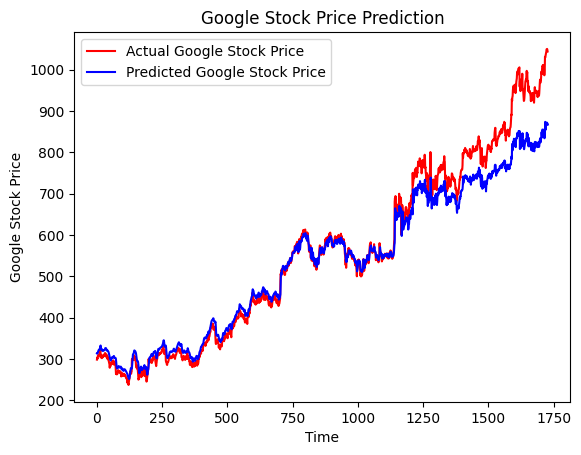

In [67]:
plt.plot(actual_stock_price,color='red',label='Actual Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
print(actual_stock_price, predicted_stock_price)
# Mean Absolute Error
actual_stock_price = actual_stock_price.flatten()
predicted_stock_price = predicted_stock_price.flatten()

# Remove NaN values
valid_indices = ~np.isnan(actual_stock_price) & ~np.isnan(predicted_stock_price)
actual_stock_price = actual_stock_price[valid_indices]
predicted_stock_price = predicted_stock_price[valid_indices]

# Print the cleaned data
print(f'Actual: {actual_stock_price}')
print(f'Predicted: {predicted_stock_price}')
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
print(f'Mean Absolute Error: {mae}')

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))
print(f'Root Mean Squared Error: {rmse}')

# R-squared
r2 = r2_score(actual_stock_price, predicted_stock_price)
print(f'R-squared: {r2}')


[ 298.24  302.81  300.04 ... 1050.05 1048.   1043.87] [313.20624 312.49588 313.49152 ... 869.7156  869.9905  869.25006]
Actual: [ 298.24  302.81  300.04 ... 1050.05 1048.   1043.87]
Predicted: [313.20624 312.49588 313.49152 ... 869.7156  869.9905  869.25006]
Mean Absolute Error: 32.01573535848547
Root Mean Squared Error: 50.095568423385345
R-squared: 0.9465206506351186
